# 1. Importing Libraries and Data

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("ticks")
sns.set_palette("deep")

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
%matplotlib inline

In [2]:
bikes = pd.read_csv("./data/london_merged.csv")

In [3]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bikes.shape

(17414, 10)

# 2. Data Cleaning

In [5]:
bikes.rename(columns={"cnt": "count",
                      "t1": "temp", 
                      "t2": "temp_feels_like",
                      "hum": "humidity"}, inplace=True)

In [6]:
bikes['weather_code'].replace({1 : "mostly_clear",
                               2 : "few_clouds",
                               3 : "broken_clouds",
                               4 : "cloudy",
                               7 : "rain",
                               10 : "rain_with_thunderstorm",
                               26 : "snowfall"}, inplace=True)

In [7]:
bikes['season'].replace({0 : "spring",
                         1 : "summer",
                         2 : "fall",
                         3 : "winter"}, inplace=True)

In [8]:
bikes['time'] = pd.to_datetime(bikes['timestamp']).dt.time

In [9]:
bikes['day_of_week'] = pd.to_datetime(bikes['timestamp']).dt.dayofweek

In [10]:
bikes['week_of_year'] = pd.to_datetime(bikes['timestamp']).dt.weekofyear

In [11]:
bikes['month'] = pd.to_datetime(bikes['timestamp']).dt.month

In [12]:
bikes['day_of_week'].replace({0 : 'monday',
                              1 : 'tuesday',
                              2 : 'wednesday',
                              3 : 'thursday',
                              4 : 'friday',
                              5 : 'saturday',
                              6 : 'sunday'}, inplace=True)

In [13]:
bikes['month'].replace({1 : 'january',
                        2 : 'february',
                        3 : 'march',
                        4 : 'april',
                        5 : 'may',
                        6 : 'june',
                        7 : 'july',
                        8 : 'august',
                        9 : 'september',
                        10 : 'october',
                        11 : 'november',
                        12 : 'december'}, inplace=True)

In [14]:
bikes.head()

,timestamp,count,temp,temp_feels_like,humidity,wind_speed,weather_code,is_holiday,is_weekend,season,time,day_of_week,week_of_year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,broken_clouds,0.0,1.0,winter,00:00:00,sunday,1,january
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,mostly_clear,0.0,1.0,winter,01:00:00,sunday,1,january
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,mostly_clear,0.0,1.0,winter,02:00:00,sunday,1,january
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,mostly_clear,0.0,1.0,winter,03:00:00,sunday,1,january
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,mostly_clear,0.0,1.0,winter,04:00:00,sunday,1,january


In [15]:
bikes['is_holiday_'] = bikes['is_holiday'] + bikes['is_weekend']

In [16]:
bikes.drop(columns=['is_holiday', 'is_weekend'], inplace=True)

In [17]:
bikes.rename(columns={'is_holiday_' : 'is_holiday'}, inplace=True)

In [18]:
bikes.head()

,timestamp,count,temp,temp_feels_like,humidity,wind_speed,weather_code,season,time,day_of_week,week_of_year,month,is_holiday
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,broken_clouds,winter,00:00:00,sunday,1,january,1.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,mostly_clear,winter,01:00:00,sunday,1,january,1.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,mostly_clear,winter,02:00:00,sunday,1,january,1.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,mostly_clear,winter,03:00:00,sunday,1,january,1.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,mostly_clear,winter,04:00:00,sunday,1,january,1.0


# 2. Exploratory Data Analysis

In [19]:
bikes.describe()

,count,temp,temp_feels_like,humidity,wind_speed,week_of_year,is_holiday
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,26.876134,0.307454
std,1085.108068,5.571818,6.615145,14.313186,7.894570,15.094488,0.461452
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,14.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,27.000000,0.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,40.000000,1.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,53.000000,1.000000


## 2.1 Multivariate (non-graphical)

In [20]:
hours = len(bikes)
days = hours/24
weeks = days/7
months = weeks/4
years = months/12

print("The observations span over (approx.):\n")
print("{:,} hours".format(hours))
print("{:.1f} days".format(days))
print("{:.1f} weeks".format(weeks))
print("{:.1f} months".format(months))
print("{:.1f} years".format(years))

The observations span over (approx.):

17,414 hours
725.6 days
103.7 weeks
25.9 months
2.2 years


In [21]:
print("Number of observations per season:\n")
print('Spring = {:,}'.format(sum(bikes['season'] == 'spring')))
print('Summer = {:,}'.format(sum(bikes['season'] == 'summer')))
print('Fall   = {:,}'.format(sum(bikes['season'] == 'fall')))
print('Winter = {:,}'.format(sum(bikes['season'] == 'winter')))

Number of observations per season:

Spring = 4,394
Summer = 4,387
Fall   = 4,303
Winter = 4,330


In [22]:
print("Number of observations per weather:\n")
print('Mostly Clear = {:,}'.format(sum(bikes['weather_code'] == 'mostly_clear')))
print('Few Clouds = {:,}'.format(sum(bikes['weather_code'] == 'few_clouds')))
print('Broken Clouds = {:,}'.format(sum(bikes['weather_code'] == 'broken_clouds')))
print('Rain = {:,}'.format(sum(bikes['weather_code'] == 'rain')))
print('Cloudy = {:,}'.format(sum(bikes['weather_code'] == 'cloudy')))
print('Snowfall = {:,}'.format(sum(bikes['weather_code'] == 'snowfall')))
print('Rain with Thunderstorm = {:,}'.format(sum(bikes['weather_code'] == 'rain_with_thunderstorm')))

Number of observations per weather:

Mostly Clear = 6,150
Few Clouds = 4,034
Broken Clouds = 3,551
Rain = 2,141
Cloudy = 1,464
Snowfall = 60
Rain with Thunderstorm = 14


In [23]:
print('Number of holidays and weekends:\n')
print('{:.2f} days - which is {:.2%} of the data.'.format((sum(bikes['is_holiday'])/24),
                                                          (sum(bikes['is_holiday'])/len(bikes))))

Number of holidays and weekends:

223.08 days - which is 30.75% of the data.


In [24]:
print("Avg. number of bike rides (per hour) per weather:\n")
print('Overall avg. number of bike rides per hour = {:,.2f}\n'.format(bikes['count'].sum() / len(bikes)))
print('Mostly Clear = {:,.2f}'.format(bikes[bikes['weather_code'] == 'mostly_clear']['count'].mean()))
print('Few Clouds = {:,.2f}'.format(bikes[bikes['weather_code'] == 'few_clouds']['count'].mean()))
print('Broken Clouds = {:,.2f}'.format(bikes[bikes['weather_code'] == 'broken_clouds']['count'].mean()))
print('Rain = {:,.2f}'.format(bikes[bikes['weather_code'] == 'rain']['count'].mean()))
print('Cloudy = {:,.2f}'.format(bikes[bikes['weather_code'] == 'cloudy']['count'].mean()))
print('Snowfall = {:,.2f}'.format(bikes[bikes['weather_code'] == 'snowfall']['count'].mean()))
print('Rain with Thunderstorm = {:,.2f}'.format(bikes[bikes['weather_code'] == 'rain_with_thunderstorm']['count'].mean()))

Avg. number of bike rides (per hour) per weather:

Overall avg. number of bike rides per hour = 1,143.10

Mostly Clear = 1,162.09
Few Clouds = 1,496.18
Broken Clouds = 1,195.12
Rain = 712.97
Cloudy = 635.23
Snowfall = 250.85
Rain with Thunderstorm = 583.43


## 2.2 Multivariate (graphical)

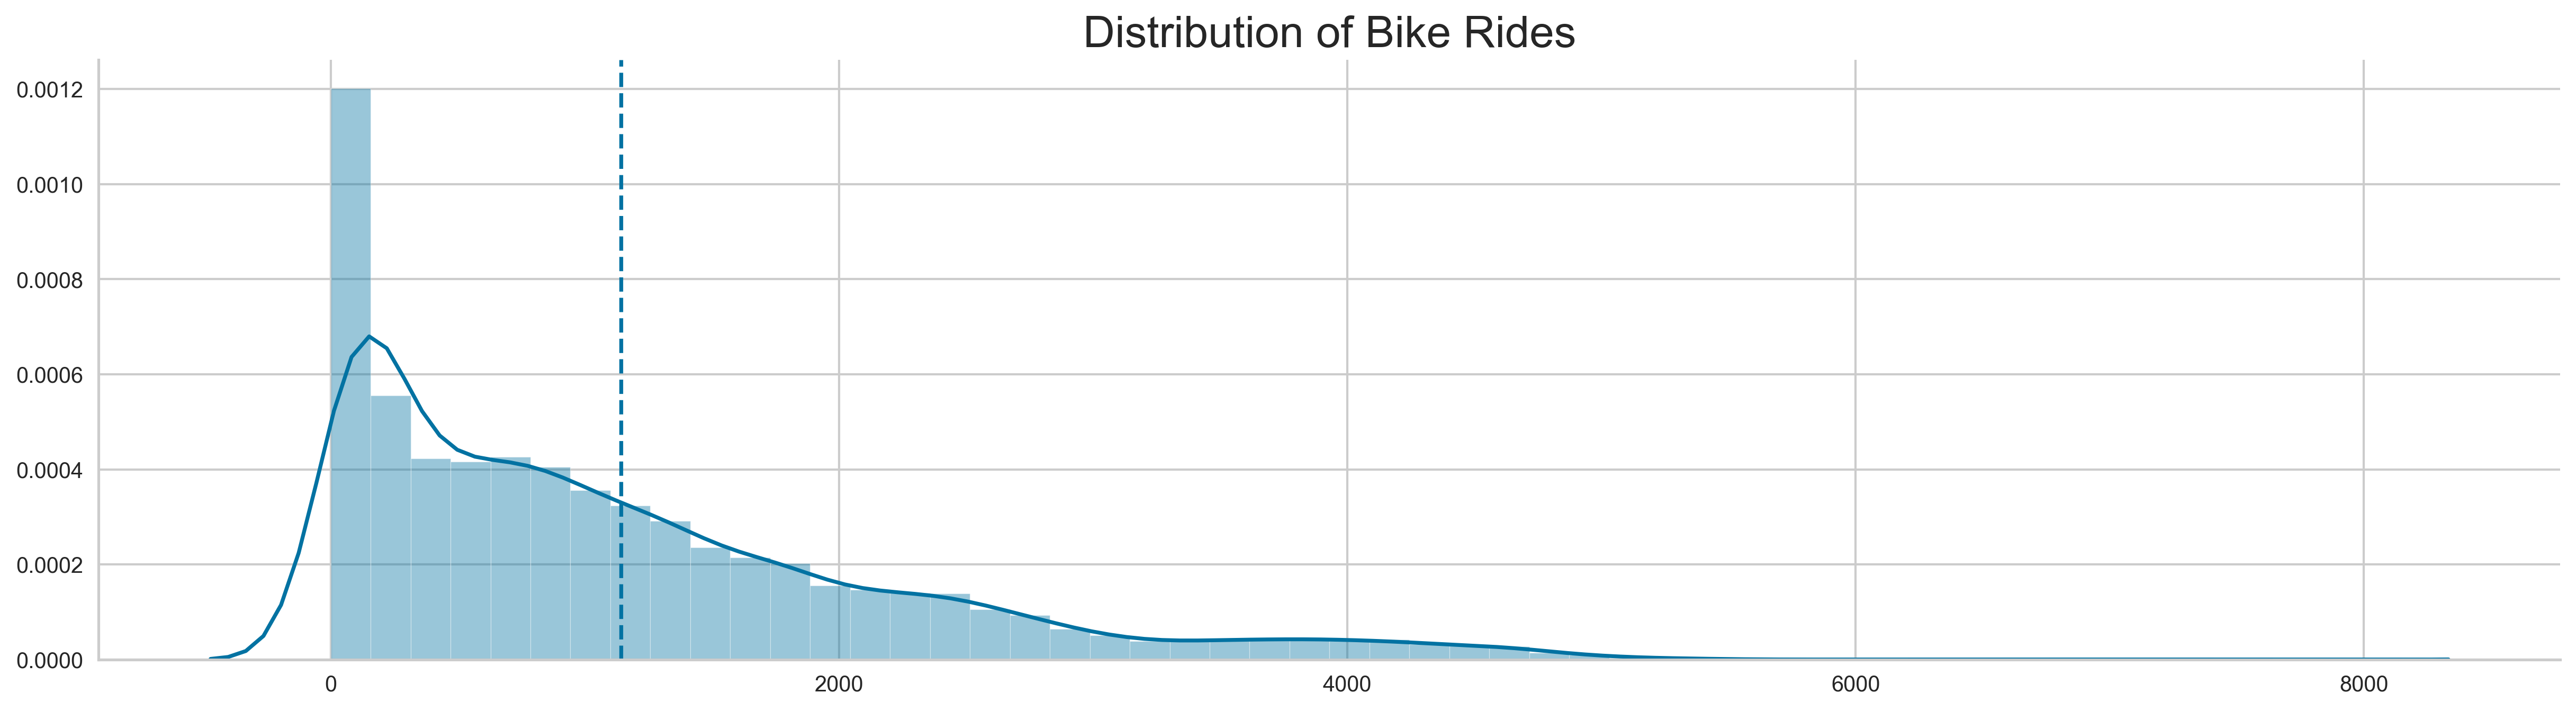

In [25]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.distplot(bikes['count']);
plt.xlabel('', fontsize = 15)
plt.title('Distribution of Bike Rides', fontsize = 20)
sns.despine(top=True)
plt.axvline(bikes['count'].mean(), ls='--');

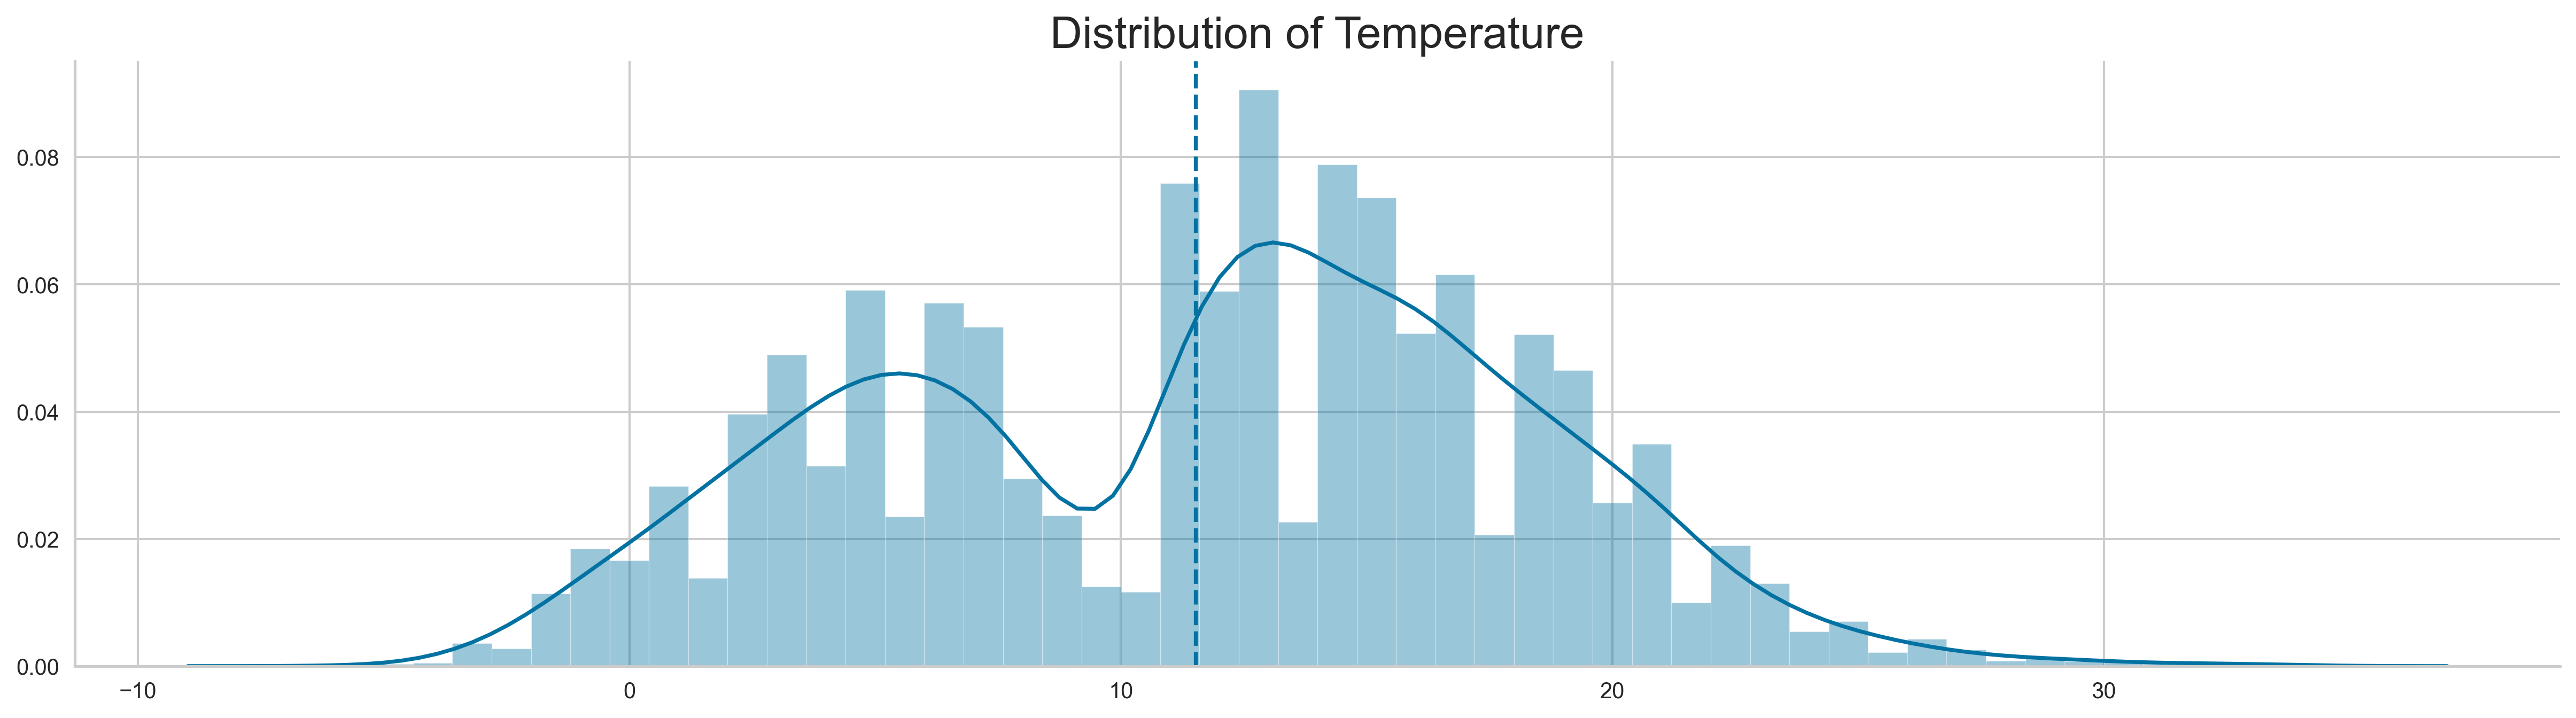

In [26]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.distplot(bikes['temp_feels_like']);
plt.xlabel('', fontsize = 15)
plt.title('Distribution of Temperature', fontsize = 20)
sns.despine(top=True)
plt.axvline(bikes['temp_feels_like'].mean(), ls='--');

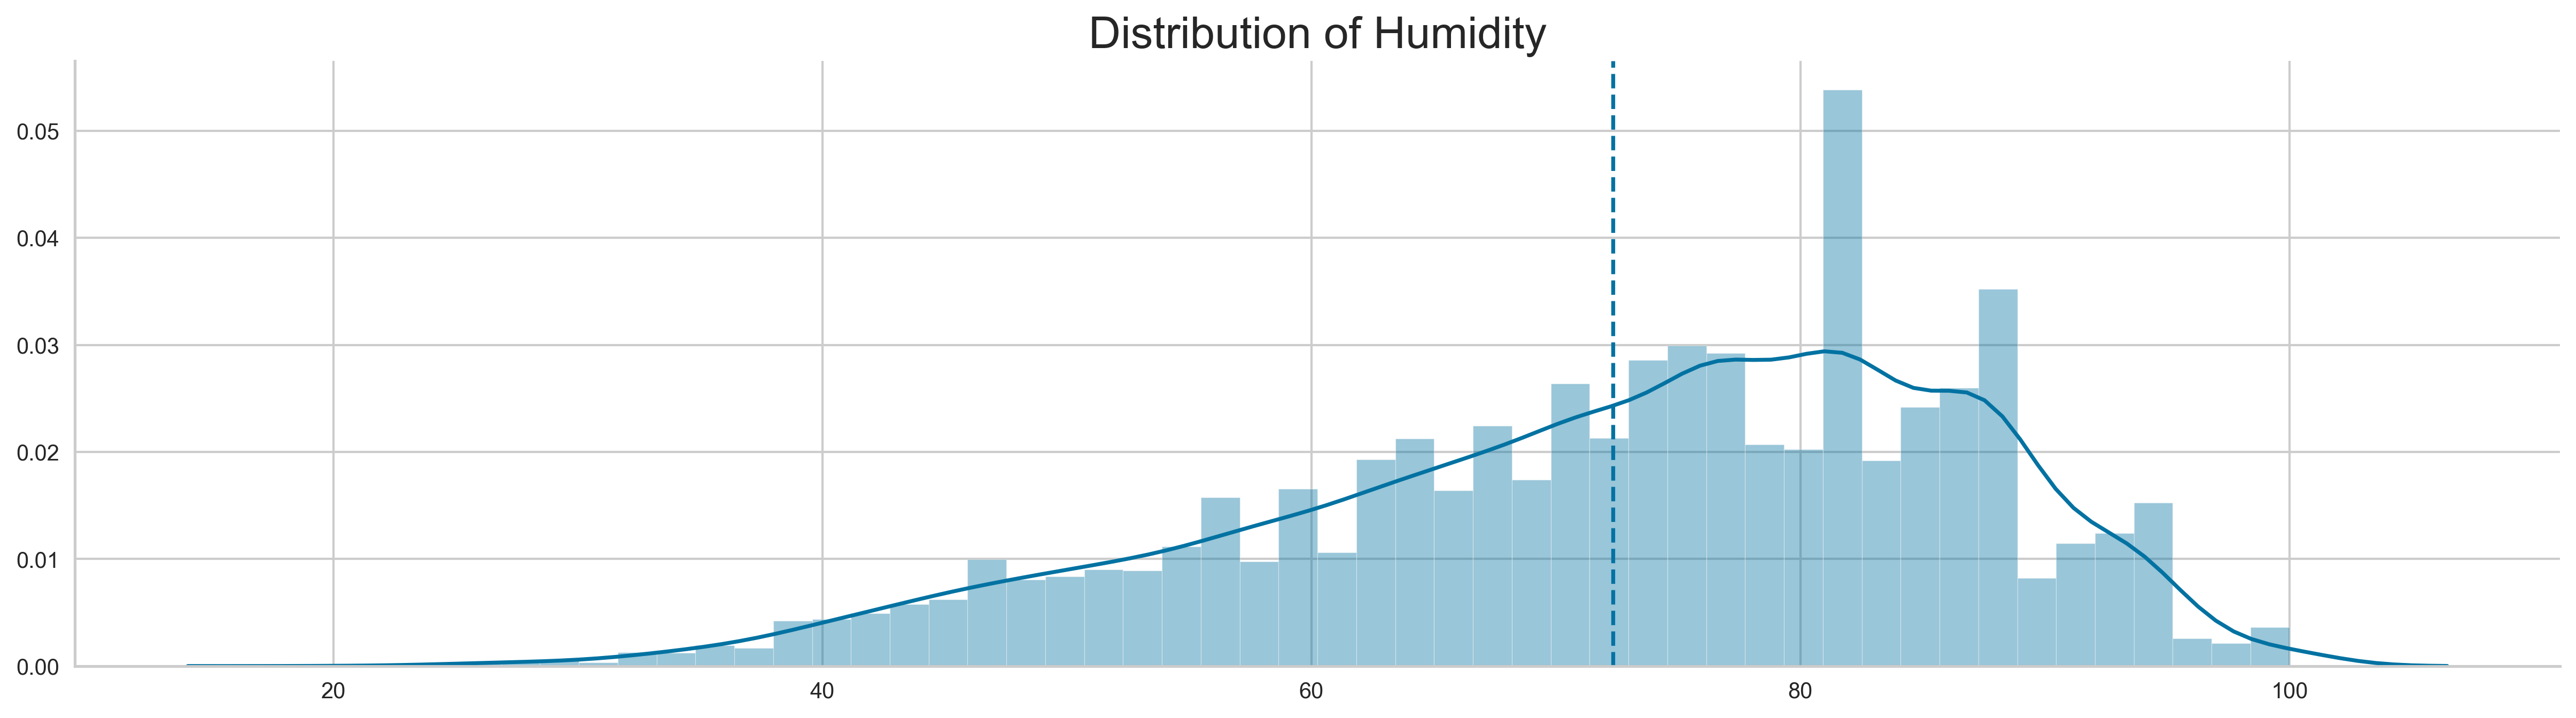

In [27]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.distplot(bikes['humidity']);
plt.xlabel('', fontsize = 15)
plt.title('Distribution of Humidity', fontsize = 20)
sns.despine(top=True)
plt.axvline(bikes['humidity'].mean(), ls='--');

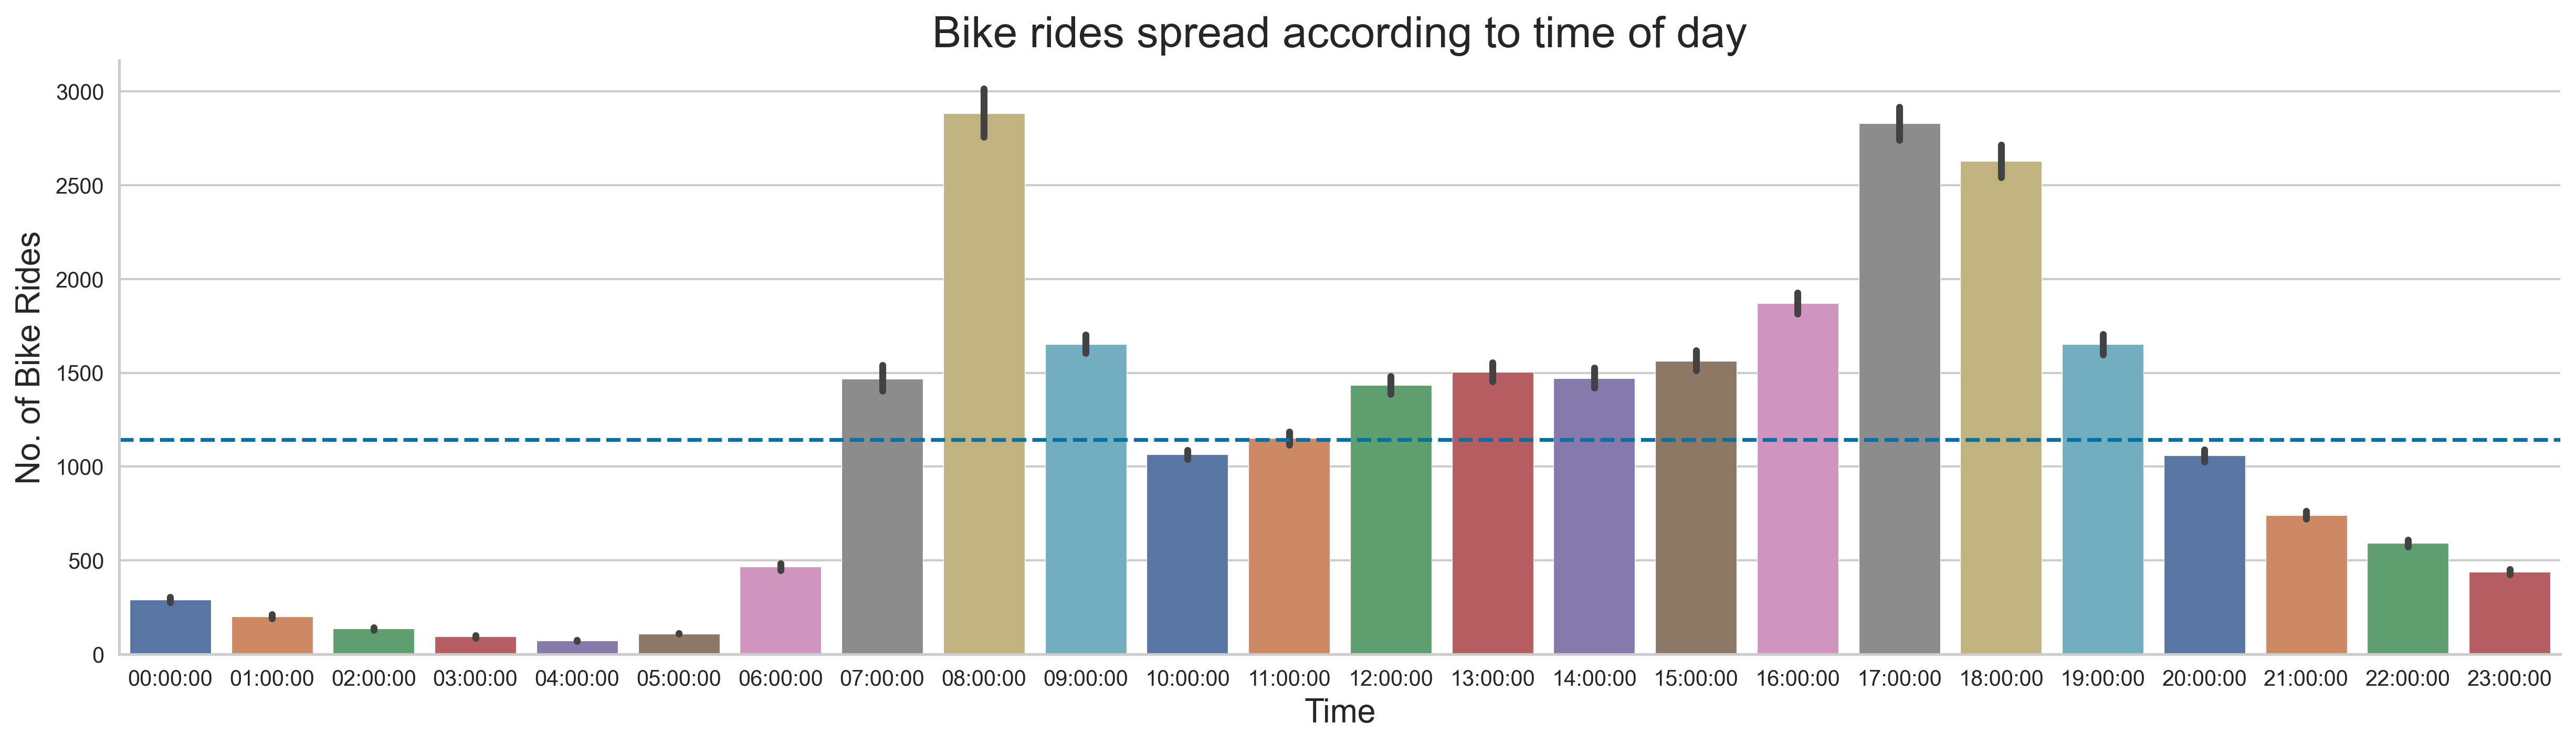

In [28]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.barplot(data=bikes,
            x='time',
            y='count',
            palette='deep');
plt.xlabel('Time', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Bike rides spread according to time of day', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

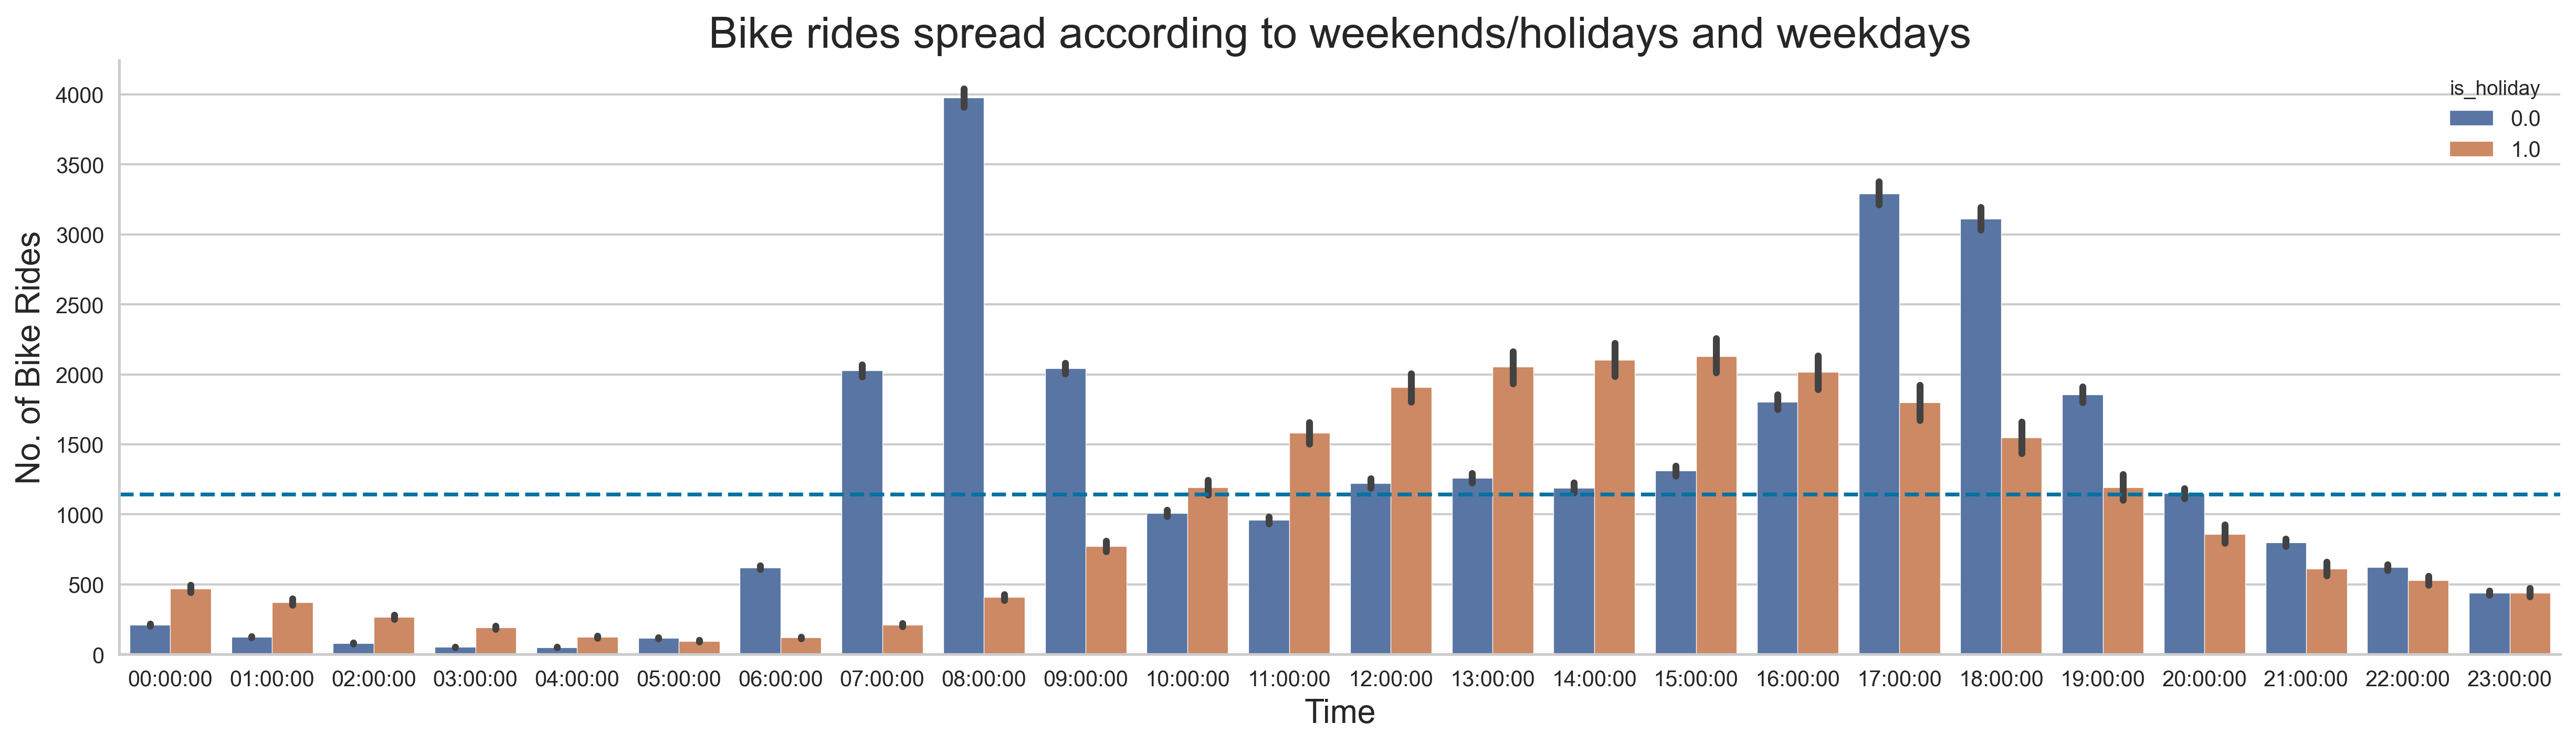

In [29]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.barplot(data=bikes,
            x='time',
            y='count',
            hue='is_holiday',
            palette='deep');
plt.xlabel('Time', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Bike rides spread according to weekends/holidays and weekdays', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

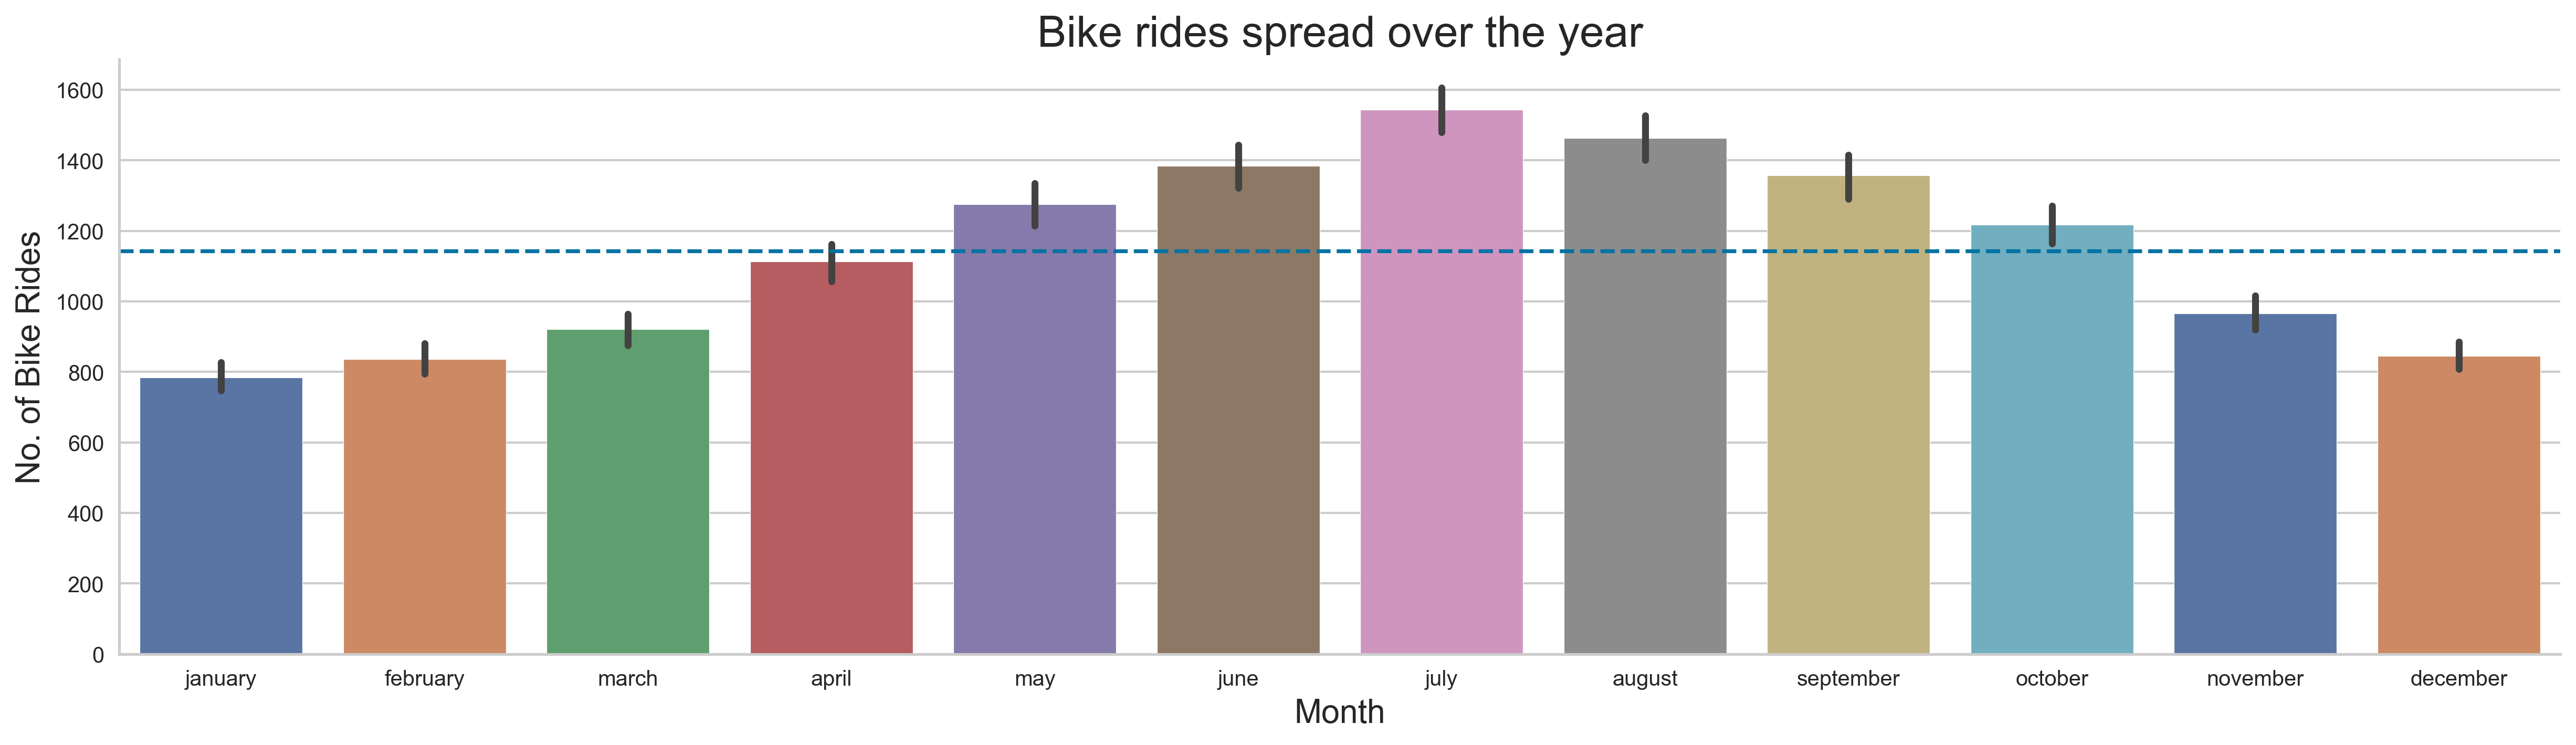

In [30]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.barplot(data=bikes,
            x='month',
            y='count',
            palette='deep');
plt.xlabel('Month', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Bike rides spread over the year', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

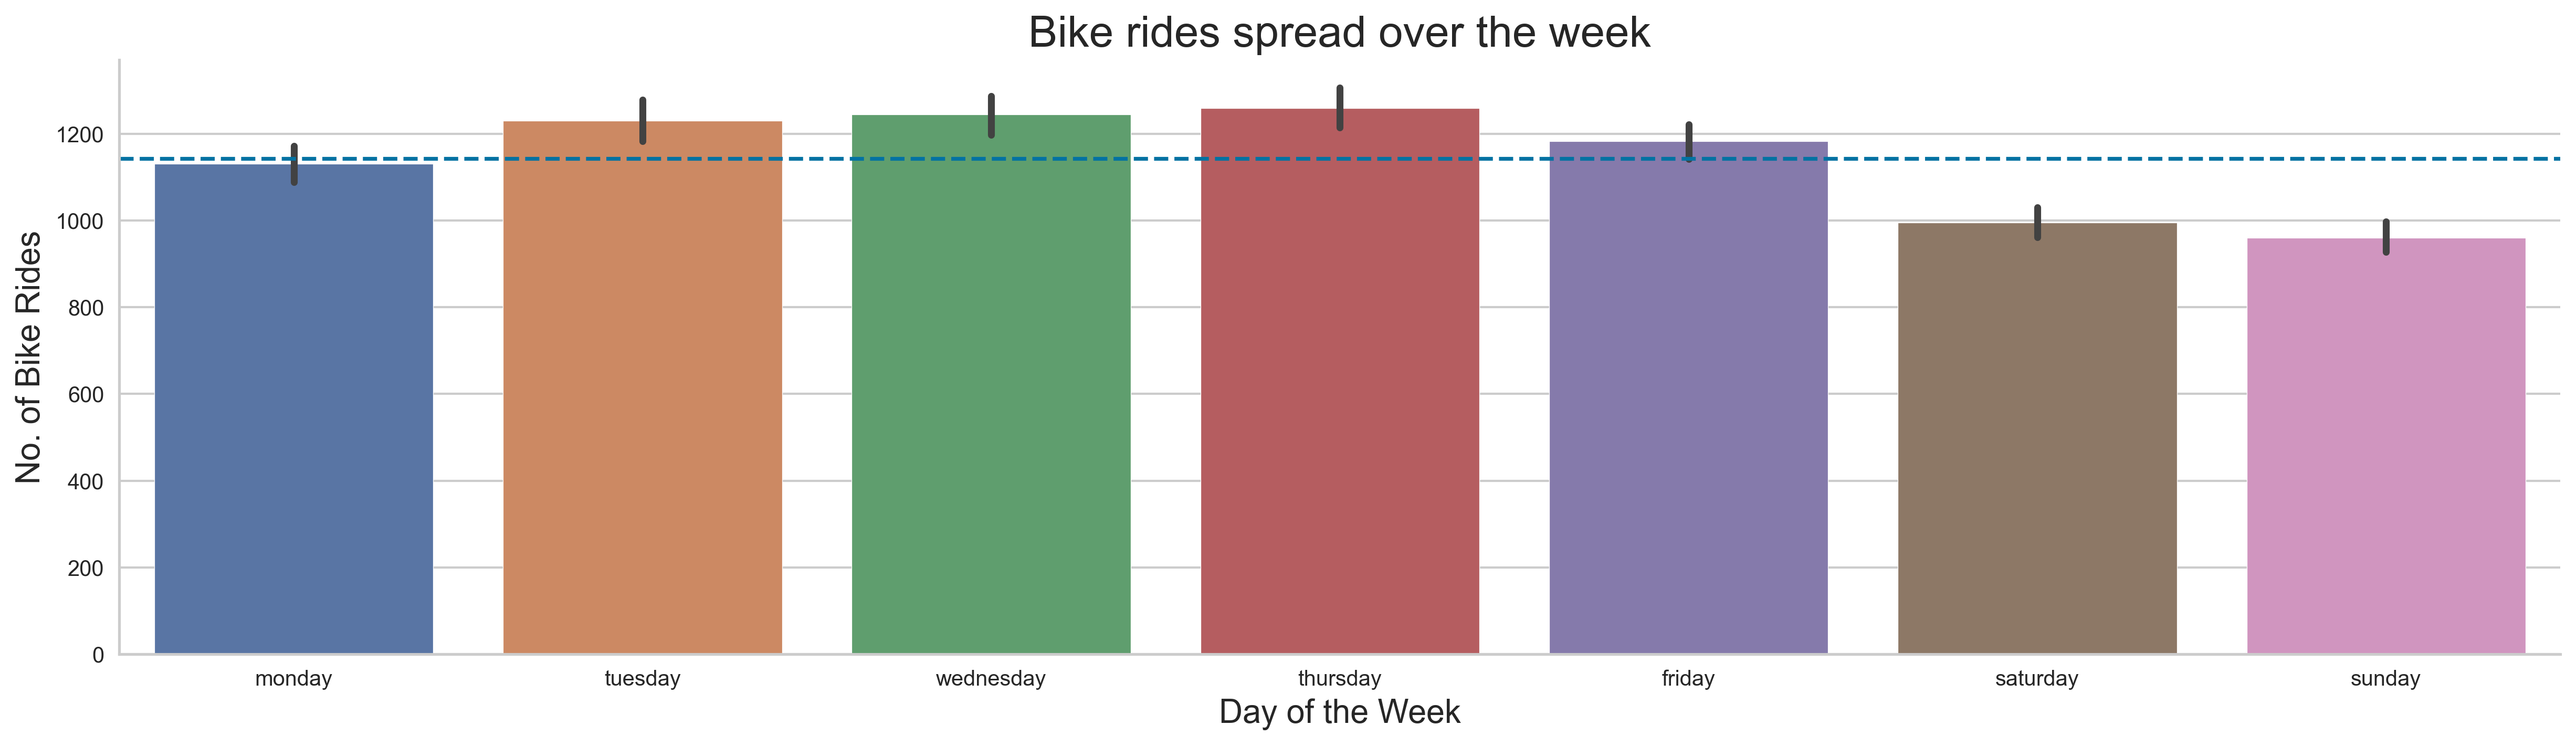

In [31]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.barplot(data=bikes,
            x='day_of_week',
            y='count',
            palette='deep',
            order=['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']);
plt.xlabel('Day of the Week', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Bike rides spread over the week', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

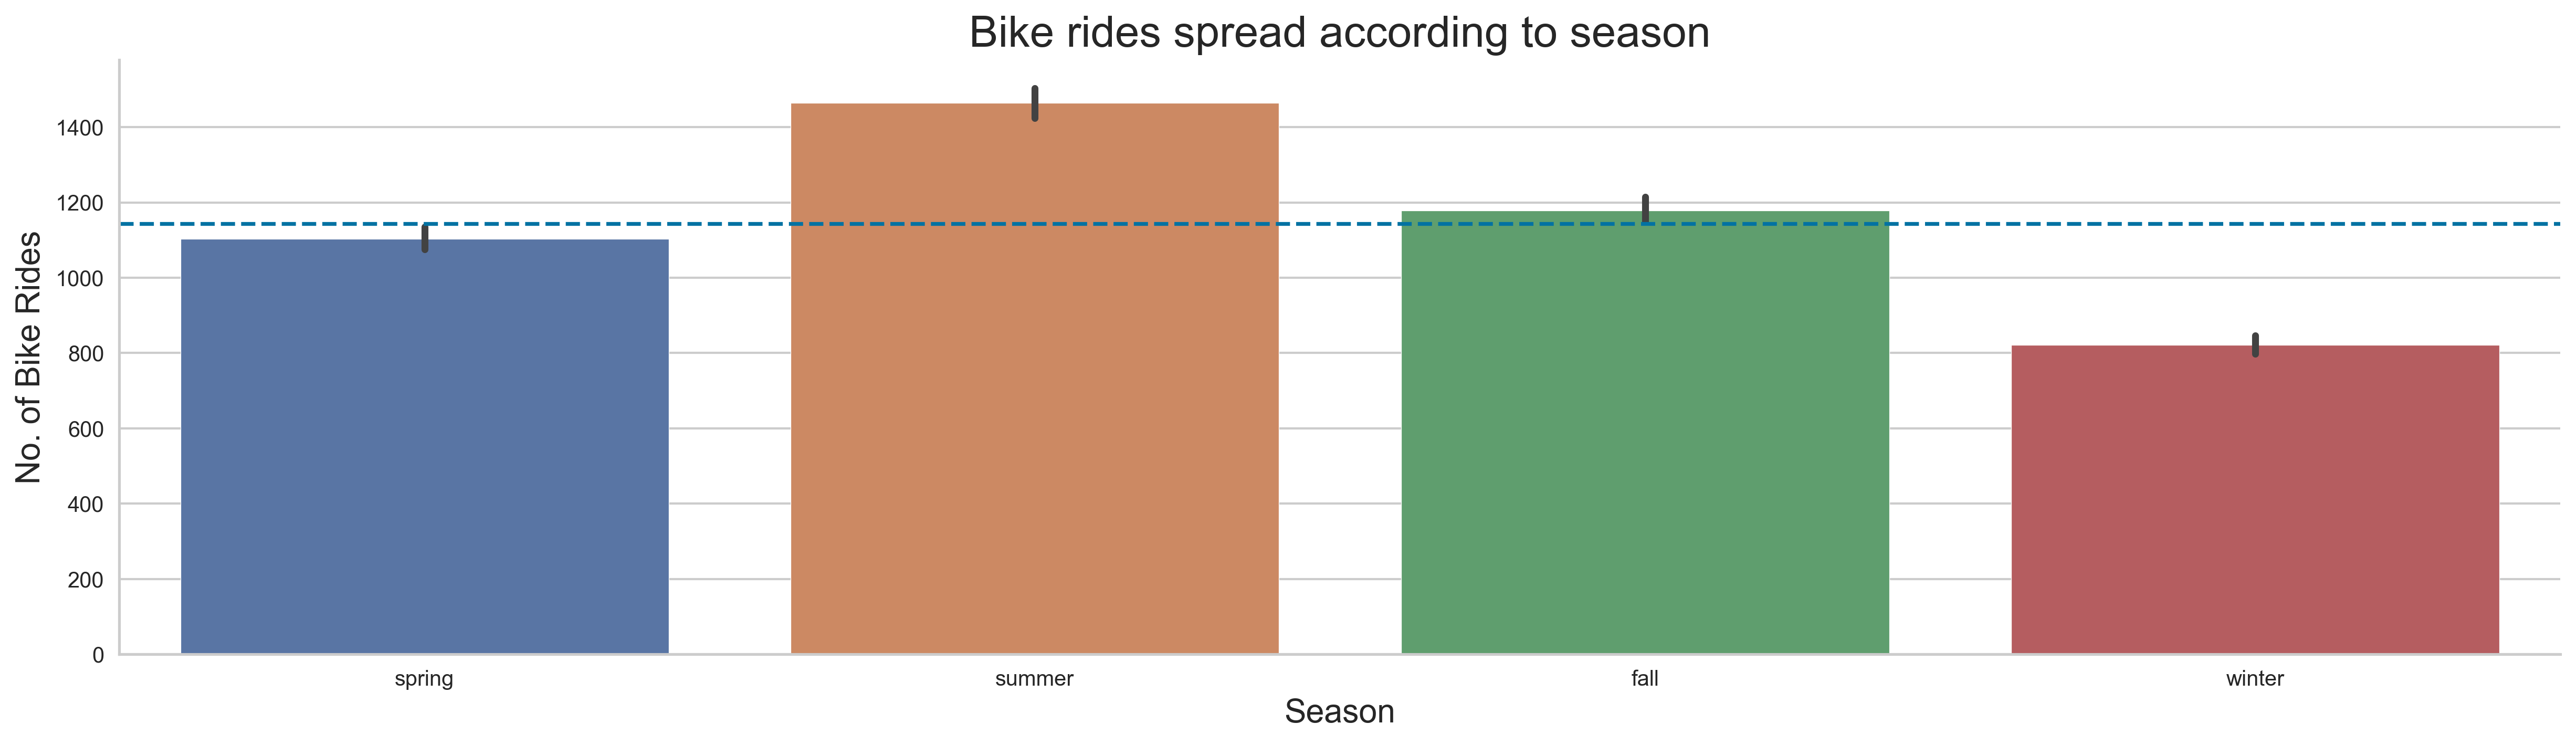

In [32]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.barplot(data=bikes,
            x='season',
            y='count',
            palette='deep',
            order=['spring', 'summer', 'fall', 'winter']);
plt.xlabel('Season', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Bike rides spread according to season', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

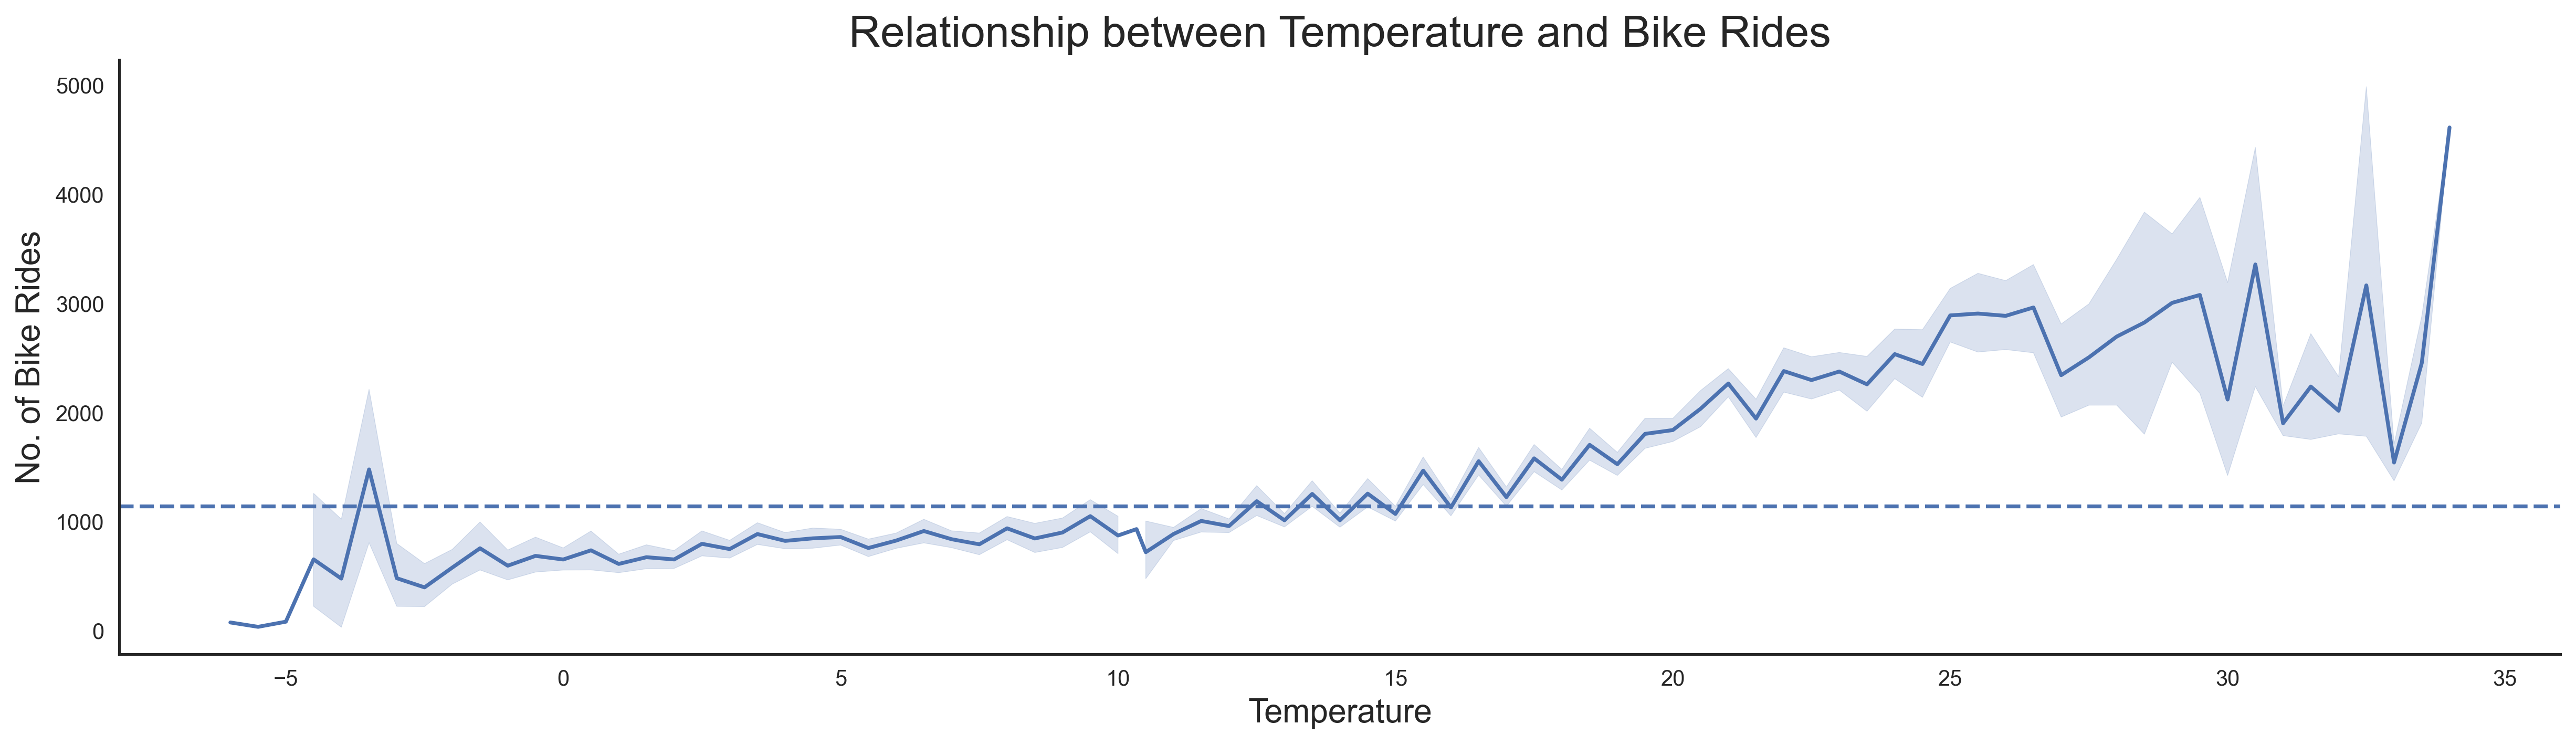

In [38]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.lineplot(data=bikes,
                  x='temp_feels_like',
                  y='count');
plt.xlabel('Temperature', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Relationship between Temperature and Bike Rides', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

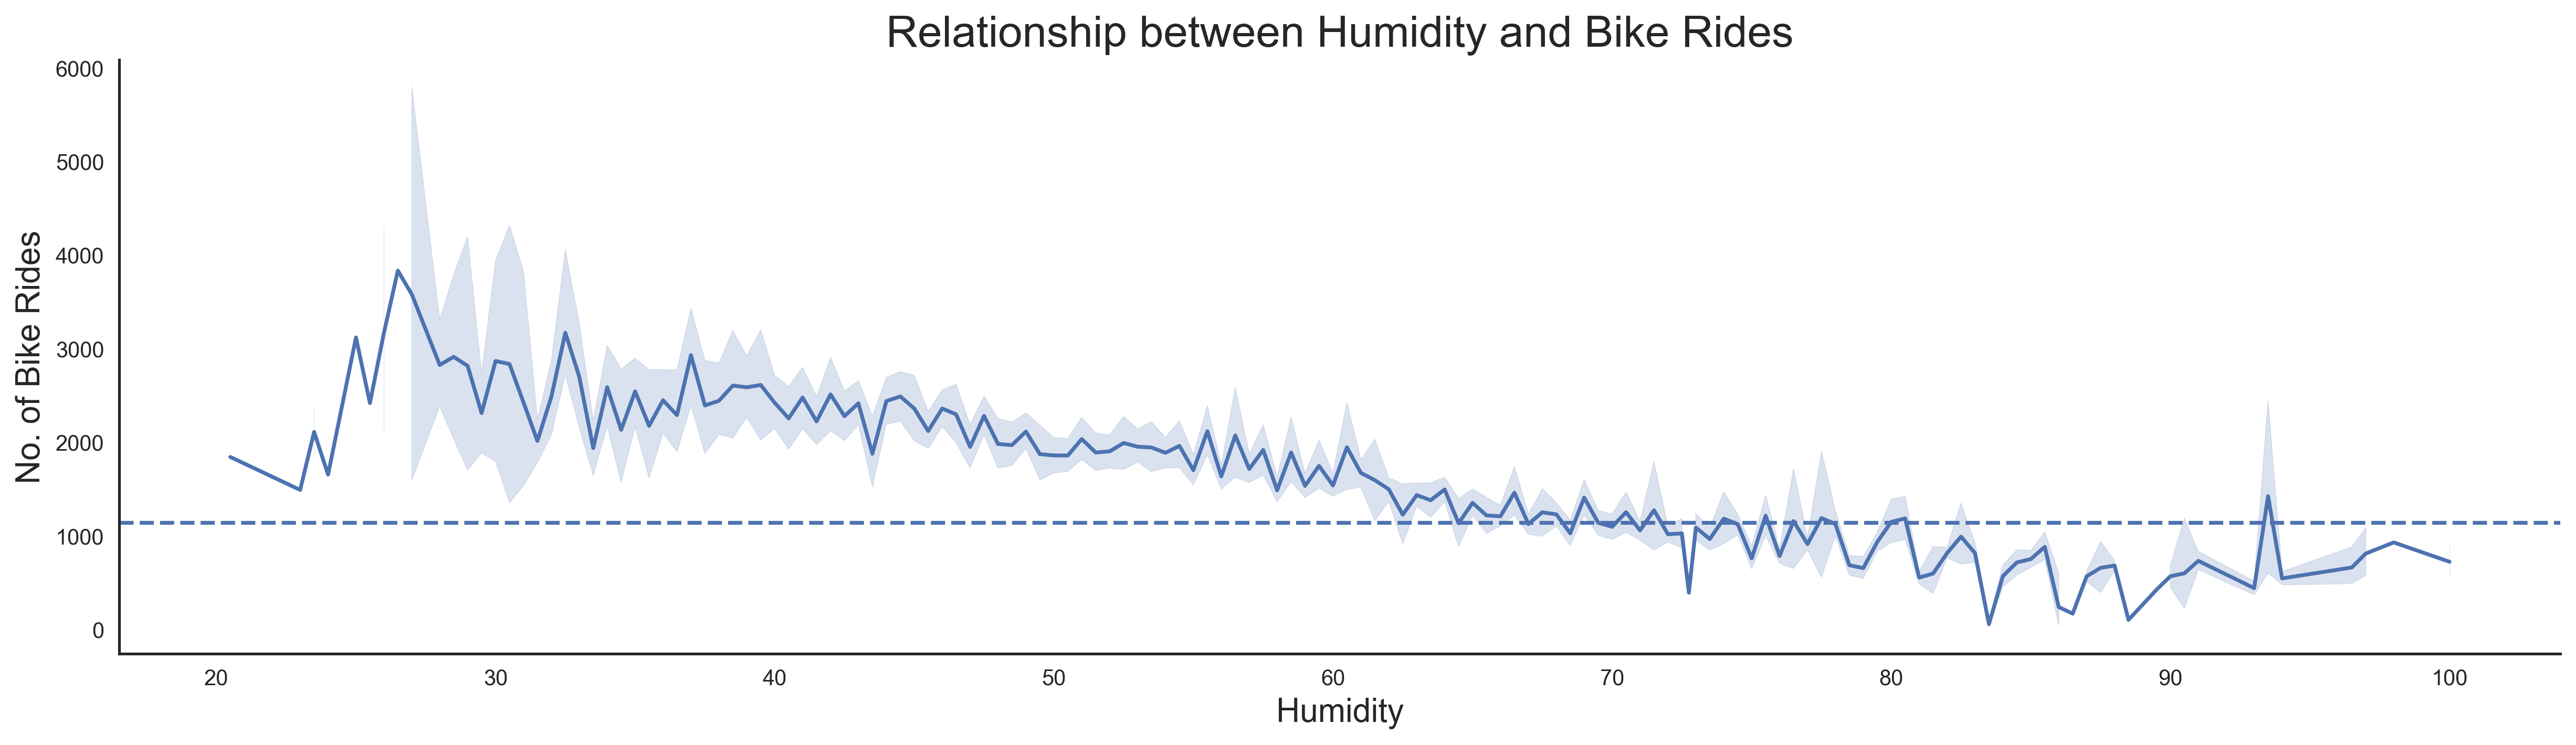

In [37]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.lineplot(data=bikes,
                  x='humidity',
                  y='count');
plt.xlabel('Humidity', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Relationship between Humidity and Bike Rides', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

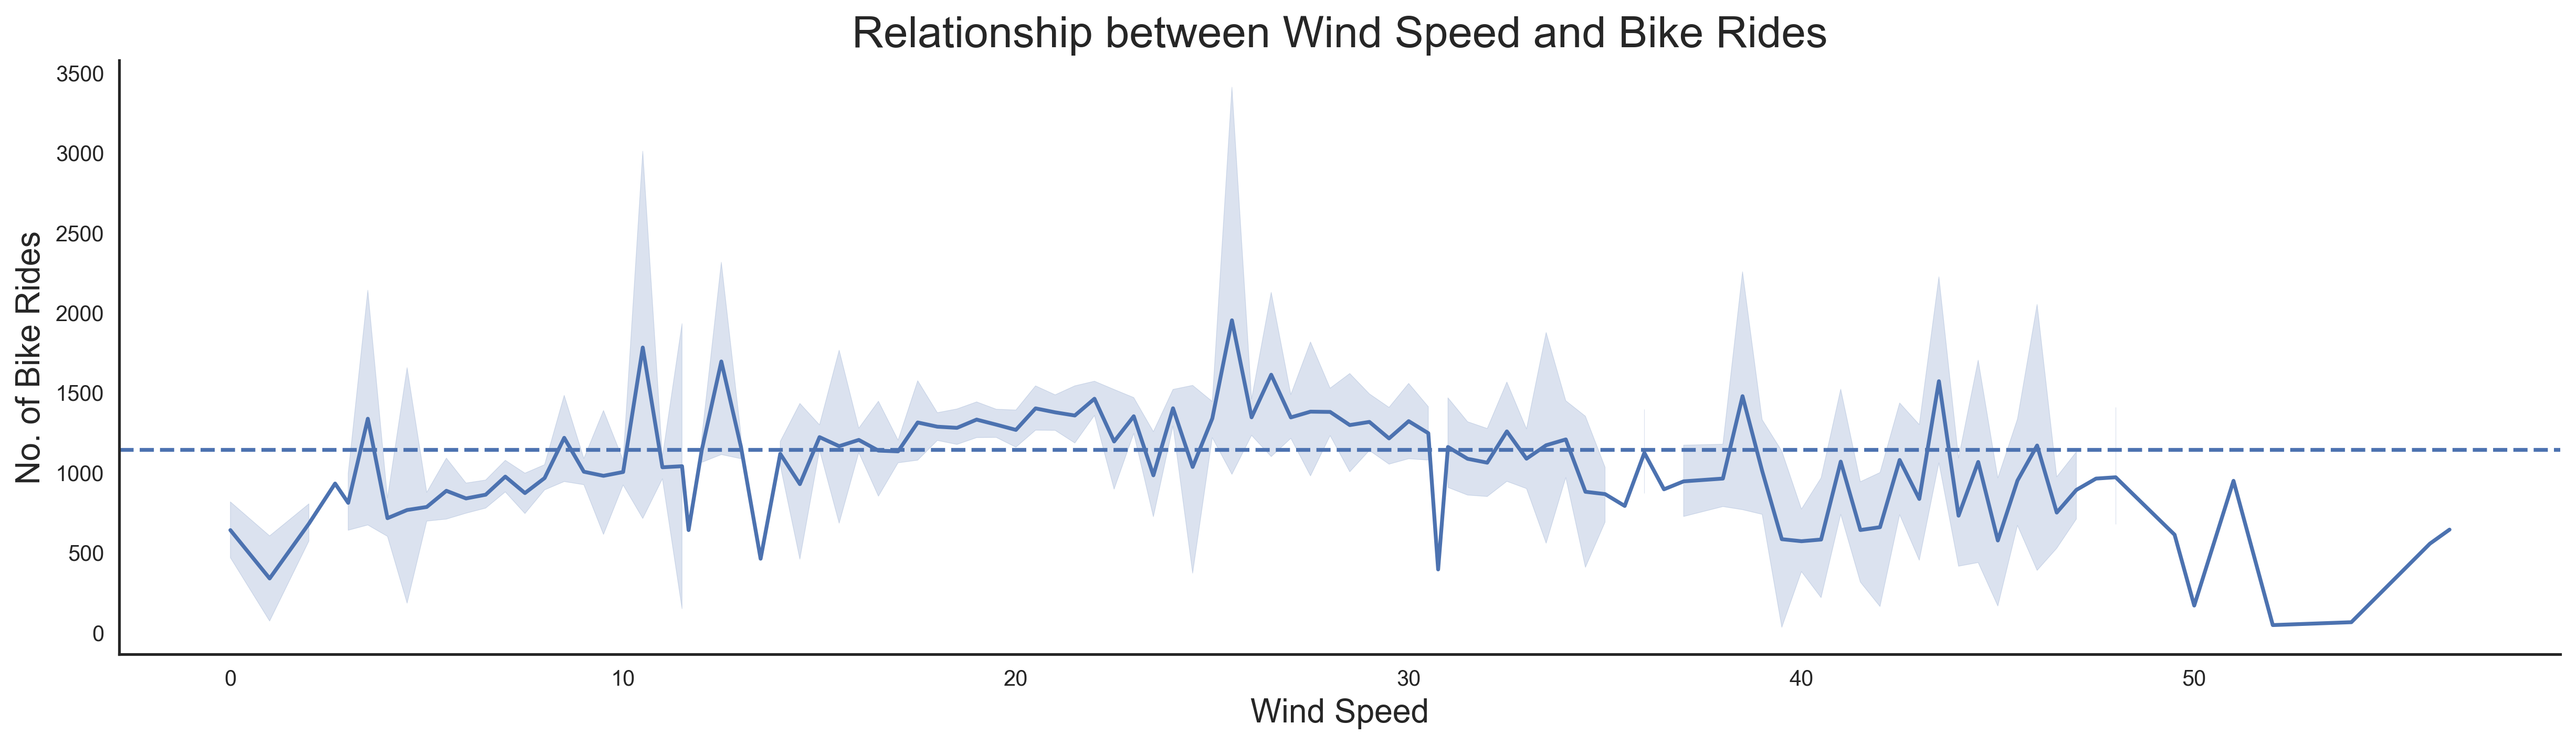

In [36]:
plt.figure(figsize=(20,5), dpi=300)
fig = sns.lineplot(data=bikes,
                  x='wind_speed',
                  y='count');
plt.xlabel('Wind Speed', fontsize = 15)
plt.ylabel('No. of Bike Rides', fontsize = 15)
plt.title('Relationship between Wind Speed and Bike Rides', fontsize = 20)
sns.despine(top=True)
plt.axhline(bikes['count'].sum() / len(bikes), ls='--');

In [40]:
bikes.to_csv(r"./data/london_merged_processed.csv", index=False)